In [35]:
!pip install pandas-datareader
!pip install yfinance


In [36]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [37]:
start = '2010-01-01'
end = '2024-10-18'

df = yf.download('TSLA', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [38]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [39]:
#Resetting the index 
df = df.reset_index()  

In [40]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [41]:
# droping date and Adj Close Column 
df = df.drop(['Date', 'Adj Close'], axis=1)

In [42]:
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


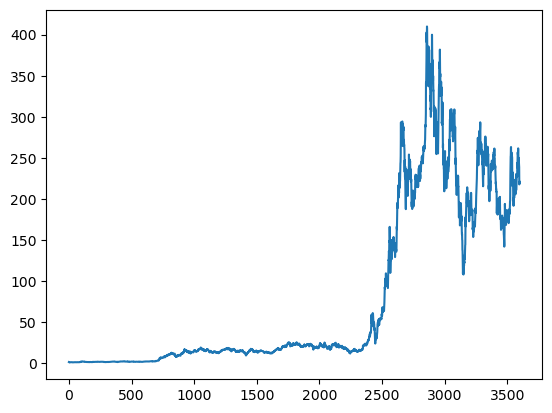

In [43]:
plt.plot(df.Close)

In [44]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3596    216.675200
3597    217.000800
3598    217.395400
3599    217.871300
3600    218.277606
Name: Close, Length: 3601, dtype: float64

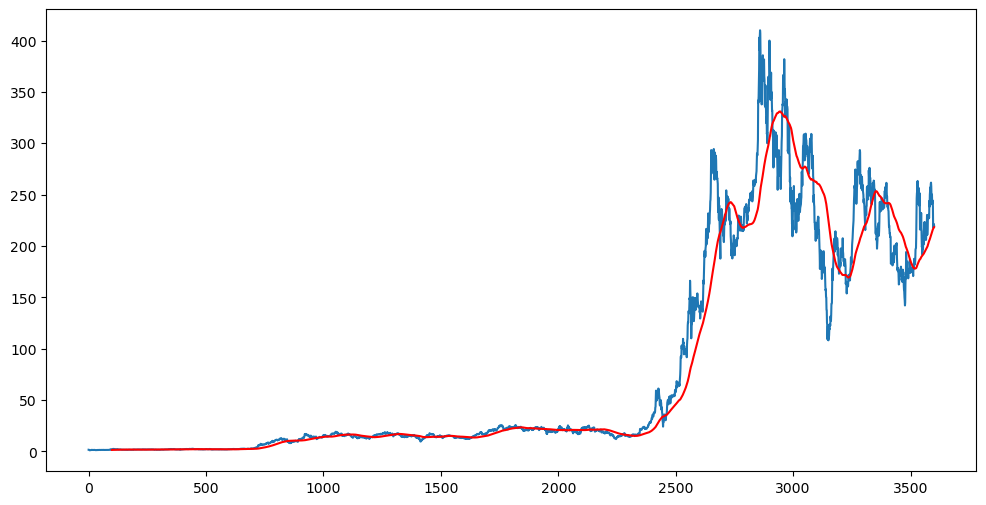

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [46]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3596    202.336350
3597    202.124950
3598    201.956900
3599    201.821150
3600    201.678403
Name: Close, Length: 3601, dtype: float64

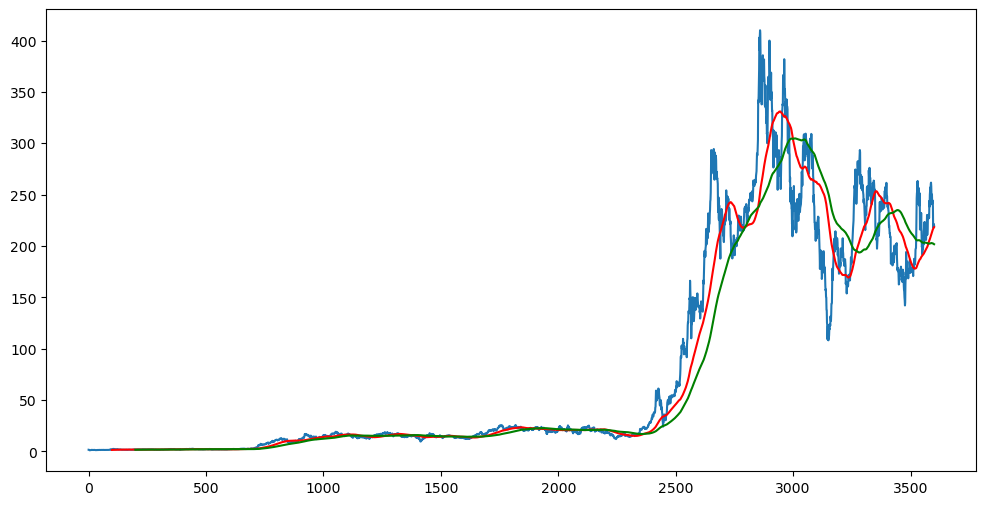

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [48]:
df.shape

(3601, 5)

In [51]:
#spliting the data into Training and Testing


data_traning = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_traning.shape)
print(data_testing.shape)

(2520, 1)
(1081, 1)


In [52]:
data_traning.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [53]:
data_testing.head()

,Close
2520,80.577332
2521,91.438667
2522,92.657333
2523,91.058670
2524,92.952003


In [56]:
!pip install scikit-learn

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [60]:
#transform the Traning Data into Array
data_traning_array = scaler.fit_transform(data_traning)
data_traning_array

array([[0.00732904],
       [0.00727468],
       [0.00558057],
       ...,
       [0.90009335],
       [0.96392565],
       [1.        ]])

In [ ]:
x_train = []
y_train = []